In [1]:
# import libraries
import pandas as pd
import matplotlib as plt

In [3]:
# read in an excel file with multiple sheets
data_full = pd.ExcelFile('BMFile2000toJul2017.xls')

#for column_headers in data_july_2017.columns: 
    #print(column_headers)

#print(data_full.sheet_names)

Display price in dollars for all countries in July 2017 as a bar chart.

Text(0, 0.5, 'Price in USD')

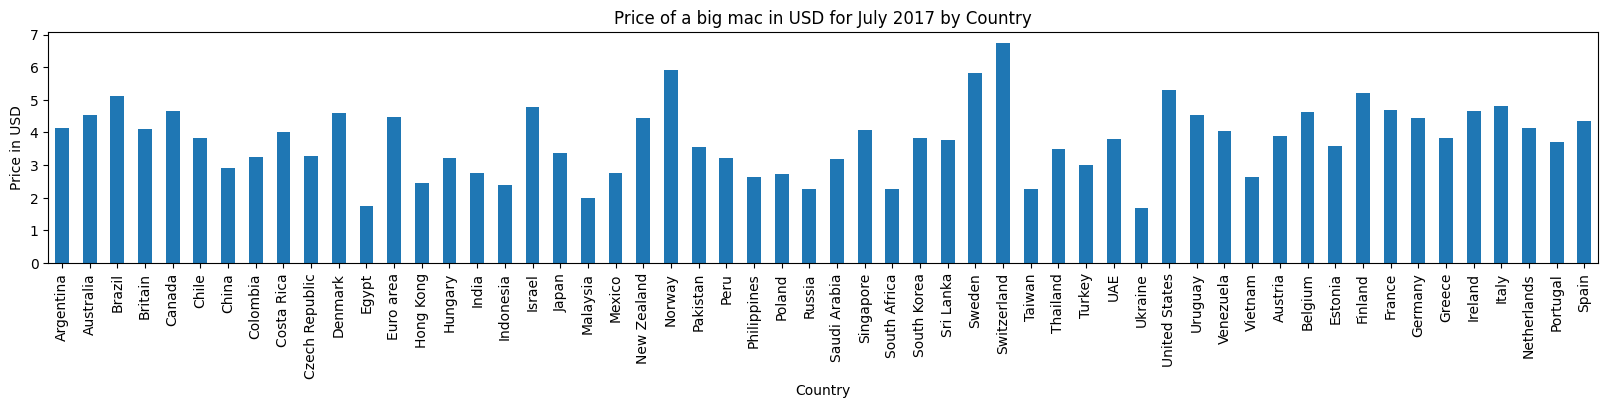

In [10]:
# set data from July 2017 as a dataframe
data_july_2017 = pd.read_excel(data_full, 'Jul2017')

# set the index to the country
data_july_2017 = data_july_2017.set_index('Country')

# plot the data
dollar_july_2017 = data_july_2017['dollar_price'].plot(kind="bar", title='Price of a big mac in USD for July 2017 by Country', figsize=(20, 3))

# add the relevant y label
dollar_july_2017.set_ylabel("Price in USD")


Display data for Malaysia from April 2000 to July 2017.

Display data from each country from April 2000 to July 2017, ensuring representation of years with no data.

Display data for all countries in July 2017 on a map.